In [ ]:
from libraries.Data import Data
data = Data()

In [ ]:
all_data = data.read_numpy(train=True, label=False)

In [ ]:
all_label = data.read_numpy(train=True, label=True)

In [ ]:
print("Input:", all_data.shape, " - Output:", all_label.shape)

In [ ]:
# https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import librosa

class ProcessAudio(object):
    data = None

    def __init__(self, sr:int = 44100):
        self.mfcc = None
        self.zcr = None
        self.rolloff = None
        self.spec_bw = None
        self.spec_cent = None
        self.rmse = None
        self.chroma_stft = None
        self.sr = sr

    def set_data(self, data):
        self.data = data

    def display_waveform(self):
        if self.data is None:
            return None
        # display waveform
        plt.figure(figsize=(14, 5))
        librosa.display.waveplot(x, sr=self.sr)

    def get_croma(self):
        if self.data is None:
            return None
        self.chroma_stft = librosa.feature.chroma_stft(y=self.data, sr=self.sr)
        return self.chroma_stft

    def get_rmse(self):
        if self.data is None:
            return None
        self.rmse = librosa.feature.rms(y=self.data)
        return self.rmse

    def get_centroide_espectral(self):
        if self.data is None:
            return None
        self.spec_cent = librosa.feature.spectral_centroid(y=self.data, sr=self.sr)
        return self.spec_cent

    def get_ancho_banda_espectral(self):
        if self.data is None:
            return None
        self.spec_bw = librosa.feature.spectral_bandwidth(y=self.data, sr=self.sr)
        return self.spec_bw

    def get_rolloff(self):
        if self.data is None:
            return None
        self.rolloff = librosa.feature.spectral_rolloff(y=self.data, sr=self.sr)
        return self.rolloff

    def get_cruce_por_cero(self):
        if self.data is None:
            return None
        self.zcr = librosa.feature.zero_crossing_rate(self.data)
        return self.zcr

    def get_mfcc(self):
        if self.data is None:
            return None
        self.mfcc = librosa.feature.mfcc(y=self.data, sr=self.sr)
        return self.mfcc

    def get_all(self):
        if self.data is None:
            return None

        self.get_croma()
        self.get_rmse()
        self.get_centroide_espectral()
        self.get_ancho_banda_espectral()
        self.get_rolloff()
        self.get_cruce_por_cero()
        self.get_mfcc()

        data_compresed = f'train{i} {np.mean(self.chroma_stft)} {np.mean(self.rmse)} {np.mean(self.spec_cent)} {np.mean(self.spec_bw)} {np.mean(self.rolloff)} {np.mean(self.zcr)}'
        for e in self.mfcc:
            data_compresed += f' {np.mean(e)}'

        return data_compresed.split()

In [ ]:
import csv
for i, y in enumerate(all_data):
    x, sr = y, 44100

    processAudio = ProcessAudio()
    processAudio.set_data(x)
    data_save = processAudio.get_all()
    data_save += all_label[i].tolist()

    with open('train.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data_save)

    # break

In [ ]:
data = Data()
all_data = data.read_numpy(train=False, label=False)
all_label = data.read_numpy(train=False, label=True)

In [ ]:
import csv
for i, y in enumerate(all_data):
    x, sr = y, 44100

    processAudio = ProcessAudio()
    processAudio.set_data(x)
    data_save = processAudio.get_all()
    data_save += all_label[i].tolist()

    with open('test.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data_save)

    # break

# Leer data

In [ ]:
# https://medium.com/@sdoshi579/classification-of-music-into-different-genres-using-keras-82ab5339efe0

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv') 
train.head() 

In [ ]:
test = pd.read_csv('train.csv') 
test.head() 

In [ ]:
# Guardar los audios que estan en el vector de datos

from scipy.io.wavfile import write
import numpy as np
samplerate = 44100

FOLDER = "data_partial/individual_separado/train/"
for i, data in enumerate(all_data[:20]):
    print(data.shape)
    write(FOLDER + f"train_{i}" + ".wav", samplerate, data)

In [18]:
# Guardar los audios que estan en el vector de datos

from scipy.io.wavfile import write
import numpy as np
samplerate = 44100

FOLDER = "data_partial/individual_separado/train/"
for i, data in enumerate(all_data[:20]):
    print(data.shape)
    write(FOLDER + f"train_{i}" + ".wav", samplerate, data)

(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)


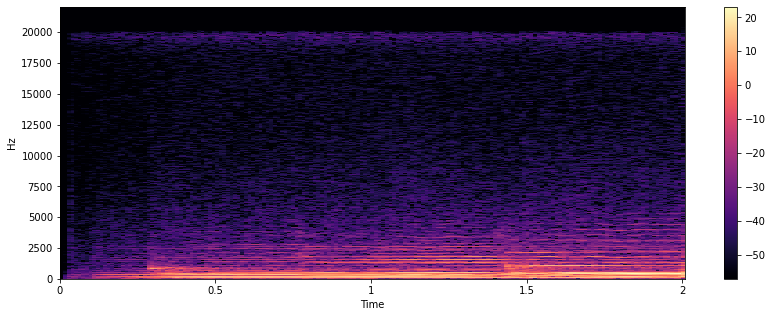

In [28]:
# Spectogram
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

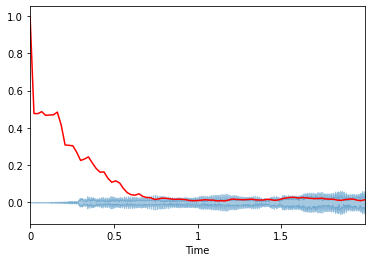

In [32]:
# Spectral Centroid

#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

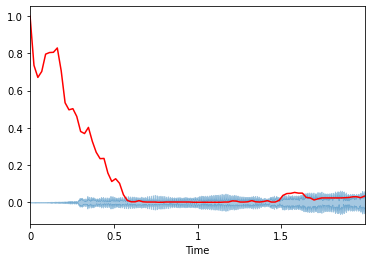

In [33]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 173)


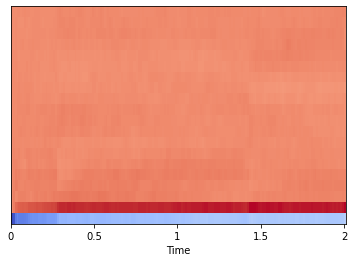

In [34]:
# MFCC — Mel-Frequency Cepstral Coefficients
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [37]:
mfccs.shape

(20, 173)

In [ ]:
# https://medium.com/@sdoshi579/classification-of-music-into-different-genres-using-keras-82ab5339efe0

In [35]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler#Keras
import tensorflow.keras